# Optional Lab - Multi-class Classification


## 1.1 Goals
In this lab, you will explore an example of multi-class classification using neural networks.
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 Tools
You will use some plotting routines. These are stored in `lab_utils_multiclass_TF.py` in this directory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Multi-class Classification
Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category. 

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

神经网络经常用于对数据进行分类。例如神经网络可以：
- 接收照片并将照片中的主题分类为{狗，猫，马，其他}
- 接收一个句子并对其元素的“词性”进行分类：{名词，动词，形容词等}

这种类型的网络的最终层将具有多个单元。每个输出与一个类别相关联。当将输入示例应用于网络时，具有最高值的输出是预测的类别。如果将输出应用于softmax函数，则softmax的输出将提供输入属于每个类别的概率。

在这个实验室中，您将看到在TensorFlow中构建多类网络的示例。然后我们将看看神经网络如何进行预测。

让我们首先创建一个四类数据集。

## 2.1 Prepare and visualize our data
We will use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.

In [2]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

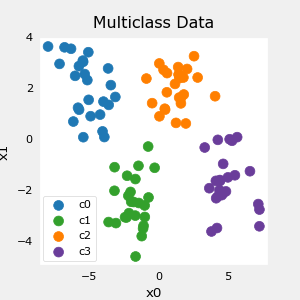

In [3]:
plt_mc(X_train,y_train,classes, centers, std=std)

Each dot represents a training example. The axis (x0,x1) are the inputs and the color represents the class the example is associated with. Once trained, the model will be presented with a new example, (x0,x1), and will predict the class.  

While generated, this data set is representative of many real-world classification problems. There are several input features (x0,...,xn) and several output categories. The model is trained to use the input features to predict the correct output category.

每个点代表一个训练样本。坐标轴（x0，x1）是输入，颜色表示样本所关联的类别。一旦训练完成，模型将被提供一个新的例子（x0，x1），并将预测其所属的类别。

虽然是生成的，但这个数据集代表了许多现实世界的分类问题。有几个输入特征（x0，...，xn）和几个输出类别。模型被训练使用输入特征来预测正确的输出类别。

In [4]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 Model
<img align="Right" src="./images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
This lab will use a 2-layer network as shown.
Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.   

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a `linear` rather than a `softmax` activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

这个实验室将使用一个如下所示的两层网络。
与二元分类网络不同，这个网络有四个输出，每个输出对应一个类别。给定一个输入样本，具有最高值的输出是输入的预测类别。

下面是如何在Tensorflow中构建这个网络的示例。注意输出层使用的是`linear`而不是`softmax`激活函数。虽然可以在输出层中包含softmax，但如果在训练期间将线性输出传递给损失函数，则更加稳定。如果模型用于预测概率，则可以在那时应用softmax。

In [5]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

The statements below compile and train the network. Setting `from_logits=True` as an argument to the loss function specifies that the output activation was linear rather than a softmax.

下面的语句编译并训练了网络。将`from_logits=True`作为参数传递给损失函数指定输出激活函数为线性而不是softmax。

In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 2.1872
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.9490
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.7716
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1.5885
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4588
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3442
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2551
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1.1890
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1336
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0920
Epoch 11/200
4/4 [==============================] - 0s 875us/step - loss: 1.0570
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0272
Epoch 13/200
4/4 [==============================] - 0s 3ms/

With the model trained, we can see how the model has classified the training data.

184/184 [==============================] - 0s 800us/step


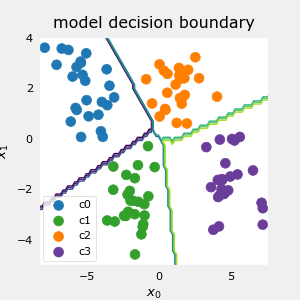

In [7]:
plt_cat_mc(X_train, y_train, model, classes)

Above, the decision boundaries show how the model has partitioned the input space.  This very simple model has had no trouble classifying the training data. How did it accomplish this? Let's look at the network in more detail. 

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how the layers combine to solve a classification problem.

在上面，决策边界显示了模型如何划分输入空间。这个非常简单的模型没有任何问题对训练数据进行分类。它是如何做到的呢？让我们更详细地看一下网络。

下面，我们将从模型中提取训练好的权重，并将其用于绘制每个网络单元的函数。在更下面，有对结果的更详细解释。您不需要了解这些细节就能成功使用神经网络，但它可能有助于更直观地理解层是如何组合来解决分类问题的。

In [8]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

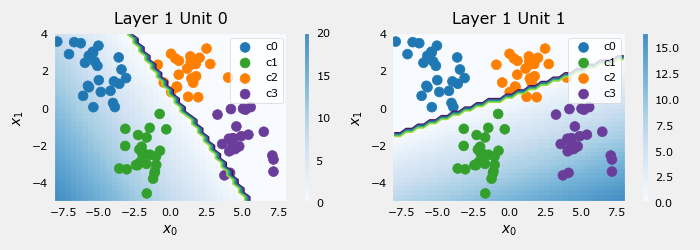

In [9]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

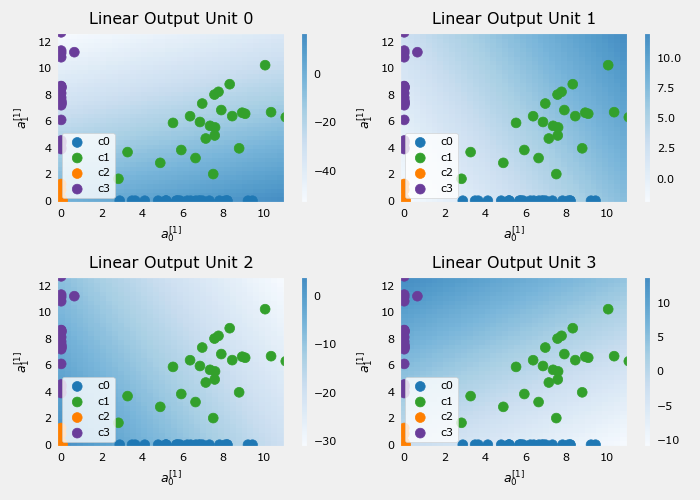

In [10]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ($x_0,x_1$) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. 
The contour lines in this graph show the transition point between the output, $a^{[1]}_j$ being zero and non-zero. Recall the graph for a ReLu :<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.  
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!

## 解释
#### 第一层 <img align="right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
这些图显示了网络第一层中单元0和单元1的函数。坐标轴上的输入是（$x_0，x_1$）。单元的输出由背景颜色表示。这在每个图的右侧的颜色条中指示。请注意，由于这些单元使用的是ReLu激活函数，输出不一定落在0和1之间，在这种情况下在其峰值处大于20。
该图中的等高线显示了输出 $a^{[1]}_j$ 为零和非零之间的转折点。回想一下ReLu的图：<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> 图中的等高线是ReLu中的拐点。

单元0将类0和1与类2和3分离开来。在线的左侧（类0和1）的点将输出为零，而在线的右侧将输出大于零的值。
单元1将类0和2与类1和3分开。在线的上方（类0和2）的点将输出零，而在线的下方将输出大于零的值。让我们看看这在下一层中是如何工作的！

#### Layer 2, the output layer  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer $a^{[1]}_0$ and $a^{[1]}_1$. As predicted above, classes 0 and 1 (blue and green) have  $a^{[1]}_0 = 0$ while classes 0 and 2 (blue and orange) have $a^{[1]}_1 = 0$.  
Once again, the intensity of the background color indicates the highest values.  
Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.    
Unit 1 produces its highest values in the upper left corner selecting class 1 (green).  
Unit 2 targets the lower right corner where class 2 (orange) resides.  
Unit 3 produces its highest values in the upper right selecting our final class (purple).  

One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done by the implied softmax function that is part of the loss function (`SparseCategoricalCrossEntropy`). Unlike other activation functions, the softmax works across all the outputs.

You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition about what is happening under the hood.

#### 第二层，输出层 <img align="right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

这些图中的点是通过第一层转换的训练样本。一种思考方式是第一层已经为第二层创建了一组新的特征以进行评估。这些图中的坐标轴是上一层的输出 $a^{[1]}_0$ 和 $a^{[1]}_1$。正如上面预测的那样，类0和1（蓝色和绿色）的点具有 $a^{[1]}_0 = 0$，而类0和2（蓝色和橙色）的点具有 $a^{[1]}_1 = 0$。
再次，背景颜色的强度表示最高值。
单元0在接近（0,0）的值处产生最大值，其中映射了类0（蓝色）。
单元1在左上角产生其最高值，选择类1（绿色）。
单元2瞄准右下角，那里是类2（橙色）所在的位置。
单元3在上右角产生其最高值，选择我们的最终类别（紫色）。

从图中并不明显的另一个方面是，值已经在单元之间协调了。对于一个单元来说，仅仅为其选择的类别产生最大值是不够的，它还必须是该类别中所有单元中的最高值。这是通过损失函数中的隐含 softmax 函数完成的 (`SparseCategoricalCrossEntropy`)。与其他激活函数不同，softmax 在所有输出上都起作用。

您可以成功使用神经网络，而不必了解每个单元的具体操作。希望这个例子为您提供了一些关于神经网络内部运作的直觉。

## Congratulations!
You have learned to build and operate a neural network for multiclass classification.
